In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale=1.0) # giving light grey background and control font size in graphs

##### simple linear

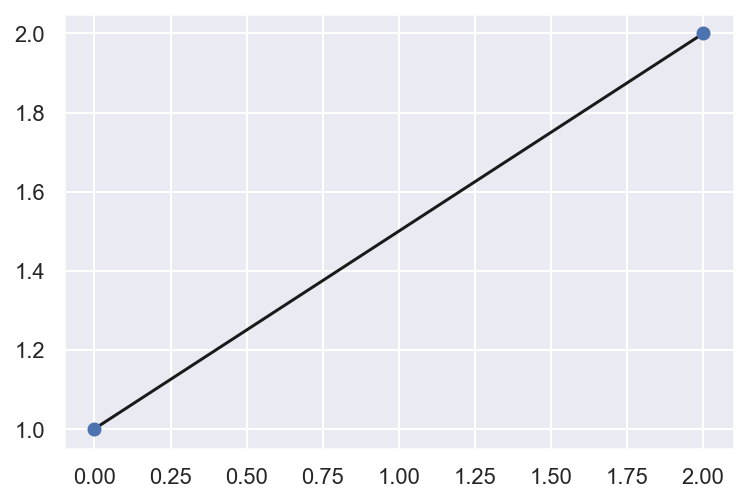

In [24]:
data = [[0,2],[1,2]] # [[],[]] is a matrix
plt.plot(data[0], data[1], 'k-') 
plt.plot(data[0], data[1], 'o')
plt.show()

In [25]:
np.transpose(data) 

array([[0, 1],
       [2, 2]])

##### simple linear

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


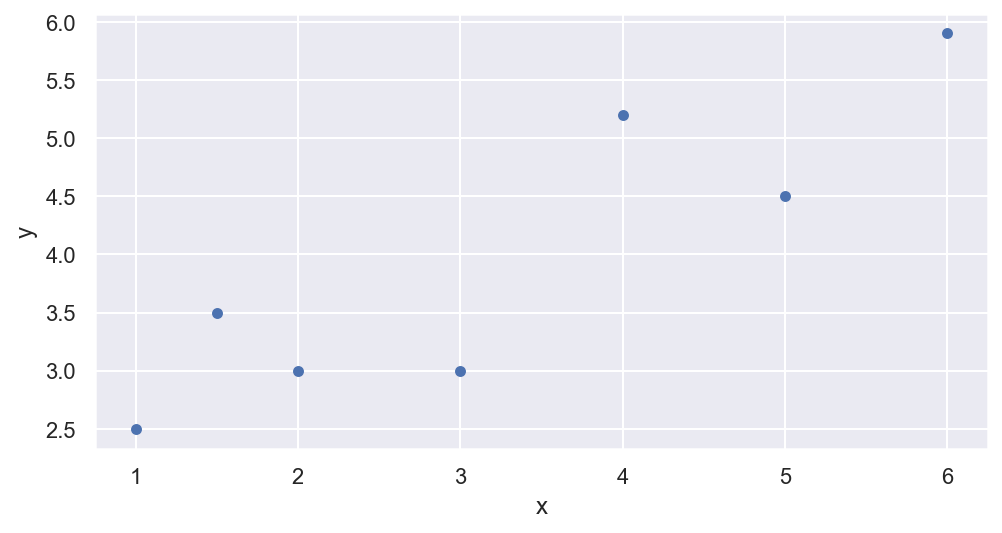

In [26]:
sample_data = [[1, 2.5], [1.5, 3.5], [2, 3.0],
               [3, 3], [4, 5.2], [5, 4.5], [6, 5.9]]
pd.DataFrame(sample_data, columns=['x','y']).plot(kind = 'scatter',
                 x='x', y='y', figsize=(8,4));

##### plotting relationship

In [27]:
df = pd.DataFrame(sample_data, columns=['x','y'])

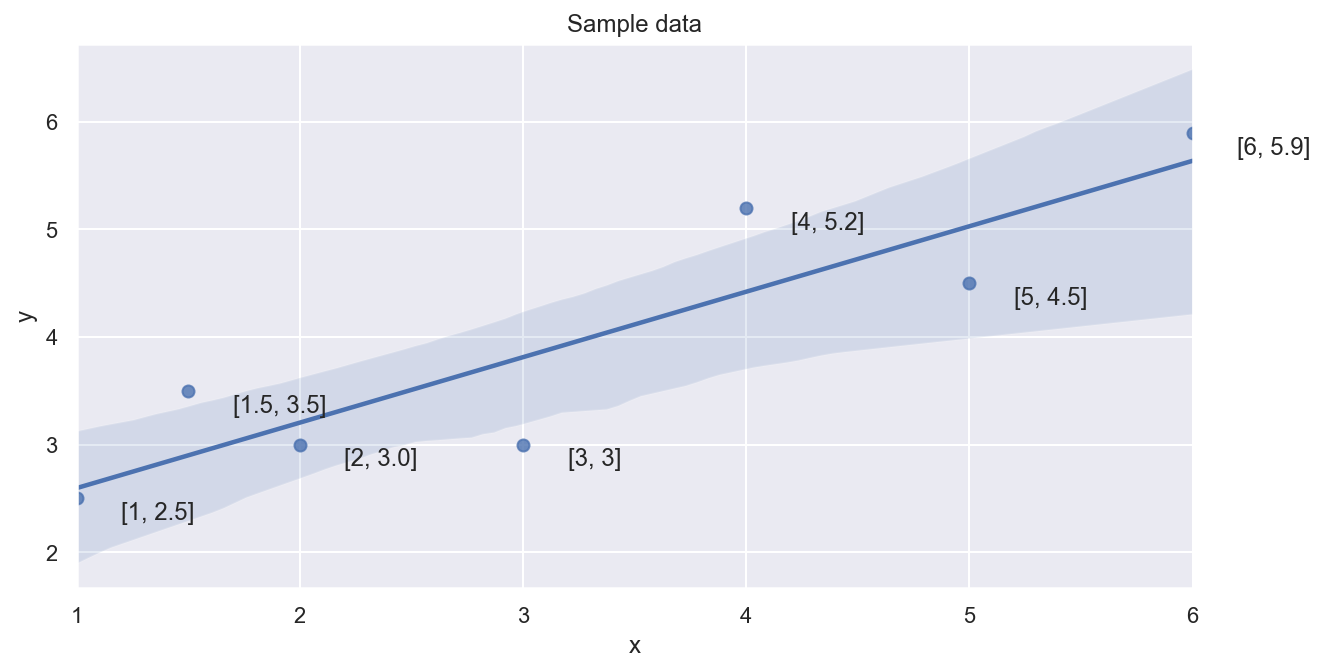

In [28]:
fig,ax = plt.subplots(figsize=(10,5))

for point in sample_data:
    ax.text(point[0] + 0.2, point[1] - 0.2, str(point))
sns.regplot(x='x', y='y', data=df, ax=ax)
ax.set_title('Sample data')
plt.show()